# Intelligence Artificielle Avancée
## TP5 : Introduction au Deep Learning

Au cas où, il nous faut d'abord vérifier la version du Keras et Tensorflow:

By Dimitri NSENG - IMSD

In [1]:
import tensorflow as tf
from tensorflow.python import keras
print("Keras:", keras.__version__)
print("Tensorflow:", tf.__version__)


Keras: 2.4.0
Tensorflow: 2.3.1


**Installer Pydot et Graphiz, si ne sont pas déjà installés:**

Puis vous devez relancer le noyau : trouver 'restart kernel' dans les menus.

## De la documentation


### Deep Learning avec Keras
- Doc keras :https://keras.io/
- Le model Sequential (premier pas) : https://keras.io/getting-started/sequential-model-guide/#getting-started-with-the-keras-sequential-model
- Un framework plus riche : https://keras.io/getting-started/functional-api-guide/

### Autres Toolkits et packages

- Lasagne : Langage *de haut niveau* comme keras


NB : Lasagne et Keras utilisent indifférement un backend parmi Theano (Univ. Montreal) et Tensorflow (Google)

- Theano :  le package de l'Univ. de Montréal

- Tensorflow :  le package Google

- Caffe : très spécialisé images

- Pytorch : la plateforme de Facebook

- ...


## Récupération d'un dataset existant
On va travailler avec un jeux de données historique que vous conaissez déjà : MNIST. Ce sont des chiffres manuscrits, donc des images en niveaux de gris, en résolution 28x28 cette fois (cela peut prendre un peu de temps - et générer un FutureWarning, ce qui n'est pas grave) :

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

dimension des données :  (60000, 28, 28) (60000,)
une données : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 121 255 165   0   0   0   0   0   0  70
  254 179   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 131 254 153   0   0   0   0   0   0 106
  254 249  50   0   0   0   0   0   0   0]

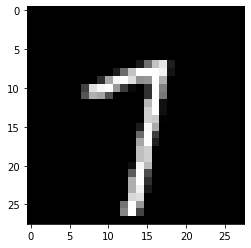

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

print("dimension des données : ", X_train.shape, y_train.shape)
print("une données : ")
print(X_test[42])

print("Une données sous format plus lisible :")
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.show()

### Prétraitement
Les données ne sont pas dans le format nécessaire à Keras : il vaut vectoriser chaque image. On va aussi les normaliser, pour n'avoir que des valeurs comprisent entre 0 et 1 (améliore la vitesse de convergence)

In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

import numpy as np
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print("Classe de la data num 42 :", y_train[42])

(60000, 784)
(10000, 784)
(60000,)
Classe de la data num 42 : 7


#### One-hot-encoding
Les réseaux de neurones ont besoin d'un vecteur à la place de *y* : on utilise un codage où la taille de ce vecteur est le nombre de classe, toutes les valeurs du vecteurs sont égales à 0, sauf celle qui correspond à la bonne classe qui elle vaut 1.

In [6]:
# On transforme les sorties (numéros de classe) en des vecteurs de type one-hot-code
nb_classes = 10

Y_train = y_train
Y_test = y_test
y_train =  np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


In [7]:
print(y_train.shape)
print("Classe de la data num 42 : ", y_train[42])

(60000, 10)
Classe de la data num 42 :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Apprendre un réseau de neurones pour la classification de MNIST
D'abord il faut créer le model.
On ajoute les couches une à une. Ici un modèle qui :
- prend en entrée un vecteur de dimension 784 (une image Mnist 28x28 vectorisée)
- transforme l'entrée en un vecteur de dimension 64 avec une couche totalement connectée (Dense), avec une fonction d'une activation de type Rectified Linear Unit 
- Transforme la sortie de la couche précédente (de dimension 64) en un vecteur de dimension 10 avec une autre couche dense 
- Transforme le vecteur de dimenbsion 10 en un autre vecteur de dimension 10 à l'aide d'une couche dense avec la fonction d'activation softmax

In [9]:
# Import from Keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential


On crée note réseau de neurones (cela génère un warning désagréable mais qui ne pause pas de problème finalement) :

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

Puis il faut "compiler" le modèle, en précisant :
- le critère d'optimisation : le *loss*
- la routine d'optimisation (ie l'utilisation du gradient) : l'*optimizer*
- les métriques additionnelles au *loss* (ici l'*accuracy*, le taux de bonne classification) que l'on va calculer à chaque fois

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['acc'])

### Affichage de la structure du modèle

Expliquee les différentes éléments de chacune des lignes affichées par la commande suivante.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________


Entre la couche d'entrée et la couche de sortie, notre réseau de neurone comporte deux couches cachées. A chaque couche on a <x,w> +b. Où x est le vecteur d'entrée, w le vecteur des poids et b a la même taille que w.

- dans la première couche on a 784*64 + 64 = 50240
- dans la 2e couche on a 64*10 + 10 = 650
- dans la couche de sortie on a 10*10 + 10 = 110

La somme donne un total de 51000 paramètres.


Ou une manière plus graphique (nécessite l'installation de pydot et surtout de graphviz, ce qui n'est pas forcément facile) :

In [13]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### On peut maintenant apprendre le modèle en précisant 
- la base d'apprentissage (les deux premiers paramètres)
- le nombre d'itérations d'apprentissage (*epochs*)
- la taille des minibatchs (*batch_size*)
- un ensemble de validation (soit on utilise comme ici un pourcentage des données d'entrée *X_train, y_train*, soit d'autres ensemble de données via *validation_data=(X_test, y_test)*)
- le niveau de verbosité de l'affichage

*(là encore, on a un WARNING, mais il n'empêche pas le code de fonctionner)*

In [14]:
h = model.fit(X_train, y_train,
              epochs=3,
              batch_size=16,
              verbose =1,
              validation_split=0.33)

Epoch 1/3
2513/2513 [==============================] - 6s 3ms/step - loss: 2.2739 - acc: 0.1315 - val_loss: 2.2457 - val_acc: 0.1543
Epoch 2/3
2513/2513 [==============================] - 6s 2ms/step - loss: 2.2251 - acc: 0.1689 - val_loss: 2.2005 - val_acc: 0.1923
Epoch 3/3
2513/2513 [==============================] - 6s 2ms/step - loss: 2.1820 - acc: 0.2031 - val_loss: 2.1576 - val_acc: 0.2286


### Evaluation
On peut alors évaluer le modèle sur l'ensemble de test

In [15]:
score = model.evaluate(X_test, y_test, verbose=2, batch_size=16)

print (score)

625/625 - 1s - loss: 2.1536 - acc: 0.2340
[2.1535675525665283, 0.23399999737739563]


### Historique de processus
Les info sur le processus d'apprentissage sont stockées dans *h*.

Comme on va en avoir besoin plusieurs fois, on écrit une fonction qui prend un historique d'apprentissage et affiche les courbes : une pour la fonction de perte (loss) et l'autre pour le taux de réussite (accuracy) :

In [16]:
def affiche_evolution_apprentissage(history):
    #affiche history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy du modèle')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['données apprentissage', 'données test'], loc='upper left')
    plt.show()
    # résumé de l'historique pour loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss du modèle')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['apprentissage', 'test'], loc='upper left')
    plt.show()

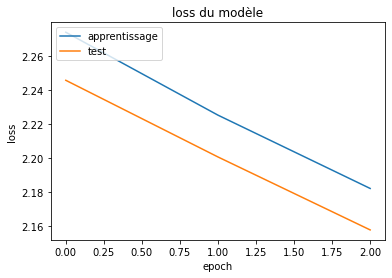

In [17]:
affiche_evolution_apprentissage(h)

En utilisant tensorflow en backend, vous avez aussi accès au [tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard) (que ceux qui le veulent y jette un coup d'oeil).

### Callback
Permet de programmer la sauvegarde des modèles à chaque itération, l'adaptation du pas d'apprentissage (learning rate), une procédure de early stopping, etc.

Voir <https://keras.io/callbacks/> pour les détails

In [18]:
# Early Stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, verbose=1, mode='auto')

# Adaptation du pas d'apprentissage
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', 
                       min_delta=0.0001, cooldown=0, min_lr=0)

h_es_lr = model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=16,
                    verbose =1,
                    validation_split=0.33,
                    callbacks=[es, lr])

Epoch 1/2
2513/2513 [==============================] - 6s 3ms/step - loss: 2.1395 - acc: 0.2353 - val_loss: 2.1147 - val_acc: 0.2585
Epoch 2/2
2513/2513 [==============================] - 7s 3ms/step - loss: 2.0976 - acc: 0.2636 - val_loss: 2.0733 - val_acc: 0.2866


## Sauver et récupérer des models

In [19]:
from keras.models import load_model

# Eventuellement, installation d'un module nécessaire :
#!pip3 install h5py

score = model.evaluate(X_test, y_test, batch_size=16)
print ("Initialement : ", score)

# Sauver le model 
model.save('mon_modele.h5')  # crée un fichier HDF5del model  

# supprime le modèle
del model

# Récupérer le modèle   
model = load_model('mon_modele.h5')

score = model.evaluate(X_test, y_test, batch_size=16)
print ("Après suppression-récupération : ", score)
print(model)

625/625 [==============================] - 1s 2ms/step - loss: 2.0669 - acc: 0.2920
Initialement :  [2.066871404647827, 0.2919999957084656]
625/625 [==============================] - 1s 1ms/step - loss: 2.0669 - acc: 0.2920
Après suppression-récupération :  [2.066871404647827, 0.2919999957084656]


## Utiliser Keras dans un code SciKit-learn (cross-validation / Grid search)

Dans Scikit-Learn, il y a une classe *KerasClassifier* qu'il peut-être utile de savoir utiliser :

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model_Mnist(optimizer='rmsprop', input_datadim = 784, init='glorot_uniform', nb_hid1= 20, do_rate= 0.5 ):
    # fonction créant un modèle pour MNIST
    """
    #Jusqu'à présent :
    m = Sequential()
    m.add(Dense(nb_hid1, input_dim=input_datadim, activation='relu'))
    m.add(Dropout(do_rate))
    m.add(Dense(64, activation='relu'))
    m.add(Dropout(do_rate))
    m.add(Dense(10, activation='softmax'))
    """
    # De façon équivalente :
    entree= Input(shape=(784,))
    cachee_1= Dense(64, activation='relu')(entree)
    cachee_2 = Dense(64, activation='relu')(cachee_1)
    sortie = Dense(10, activation="softmax")(cachee_2)
    m = Model(entree, sortie)
    
    m.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    m.summary()
    return m

model = KerasClassifier(build_fn=create_model_Mnist)

# valeurs des différents paramètres
optimizers = ['adam', 'rmsprop']
init = ['glorot_uniform']
V_nb_hid1 = [100]
DO_rate=[0, 0.5]

epochs = 2

param_grid = dict(optimizer=optimizers, init=init,  nb_hid1=V_nb_hid1, do_rate= DO_rate)

print(param_grid)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, epochs = epochs, verbose=2)

# Résumé des résultats
print("-----------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("-----------------------------")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

{'optimizer': ['adam', 'rmsprop'], 'init': ['glorot_uniform'], 'nb_hid1': [100], 'do_rate': [0, 0.5]}
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1250/1250 - 3s - loss: 0.3295 - accuracy: 0.9057
Epoch 2/2
1250/1250 - 3s - loss: 0.1492 - accuracy: 0.9559
625/625 [===================

Epoch 1/2
1250/1250 - 2s - loss: 0.3162 - accuracy: 0.9097
Epoch 2/2
1250/1250 - 2s - loss: 0.1403 - accuracy: 0.9582
625/625 [==============================] - 1s 1ms/step - loss: 0.1603 - accuracy: 0.9518
Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1250/1250 - 2s - loss: 0.3315 

### Récupération des vecteurs d'activation d'une couche
Une fois un réseau appris, on peut avoir besoin des vecteurs de sortie d'une couche cachée. Avec Keras, il suffit de créer un nouveau modèle qui ne contient que le début du réseau jusqu'à la couche dont on veut accéder aux sorties.

In [21]:
#réseau complet
entree= Input(shape=(784,))
cachee_1= Dense(64, activation='relu')(entree)
cachee_2 = Dense(64, activation='relu')(cachee_1)
sortie = Dense(10, activation="softmax")(cachee_2)
m = Model(entree, sortie)

#apprentissage
m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
m.fit(X_train, y_train, epochs=2, batch_size=16, verbose =1, validation_split=0.33)

Epoch 1/2
2513/2513 [==============================] - 6s 2ms/step - loss: 0.2856 - accuracy: 0.9166 - val_loss: 0.1709 - val_accuracy: 0.9494
Epoch 2/2
2513/2513 [==============================] - 6s 2ms/step - loss: 0.1283 - accuracy: 0.9602 - val_loss: 0.1334 - val_accuracy: 0.9604


In [22]:
#réseau partiel
m2 = Model(entree,cachee_1)

#On aurait aussi pu faire :
# m2 = Sequential()
# m2.add(Dense(64,input_dim=784, activation='relu', weights=m.layers[0].get_weights()))

#récupération d'une matrice d'activation :
#chaque ligne est le vecteur de sortie de la dernière couche de m2 pour la donnée correspondante
activite = m2.predict(X_test)
print(activite.shape)

(10000, 64)


# A faire

## Apprentissage d'un réseau de neurones sur les données iris


Apprendre un réseau de neuronnes réalisant la classification 3 classes sur les données iris.


**Question**. En utilisant Pandas, lire les données iris à partir de la bibliothèque Sklearn et compléter les instructions ci-dessous:

In [23]:
from sklearn.datasets import load_iris
import pandas as pd

# Lire les données iris
iris = load_iris()


# Charger des données dans un DataFrame

#..........Ecrire votre instruction ici............
df = pd.DataFrame(iris.data)

# Convertir le type de données en float

#..........Ecrire votre instruction ici............
df.astype('float')

# ajoutez "target" dans le DataFrame et nommez-le "label"

#..........Ecrire votre instruction ici............
df['label'] = iris.target

# Utilisez plutôt une étiquette de chaîne
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))


**Question.** Afficher le contenu du DataFrame

In [24]:
df.head()

0    1    2    3   label
0  5.1  3.5  1.4  0.2  setosa
1  4.9  3.0  1.4  0.2  setosa
2  4.7  3.2  1.3  0.2  setosa
3  4.6  3.1  1.5  0.2  setosa
4  5.0  3.6  1.4  0.2  setosa

**Question.** Transformer les labels de classes en des vecteurs de type one-hot-code et supprimer l'ancien label

In [25]:
df.loc[df["label"]=="setosa","label"]=0
df.loc[df["label"]=="versicolor","label"]=1
df.loc[df["label"]=="virginica","label"]=2

**Question.** Ré-afficher le contenu du nouveau DataFrame.

In [26]:
print(df.head())

     0    1    2    3 label
0  5.1  3.5  1.4  0.2     0
1  4.9  3.0  1.4  0.2     0
2  4.7  3.2  1.3  0.2     0
3  4.6  3.1  1.5  0.2     0
4  5.0  3.6  1.4  0.2     0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Question.** Donner une petite explication sur la différence entre l'ancien DatFrame et celui-ci.

**Question.** Extraire les données x (samples) et y (classes) à partir des données iris, en les convertant en Numpy pour faire la classification (En utilisant toujours Pandas)

In [28]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

print("Taille de X",X.shape)
print("Taille de y",y.shape)
print("Examples de X\n",X[:3])
print("Examples de y\n",y[:3])

Taille de X (150, 4)
Taille de y (150,)
Examples de X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Examples de y
 [0 0 0]


**Question.** Découper les données en ensembles de training et test (20 % pour le test).

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 

#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


**Question.** Construire un modèle du réseau de neurones séquentiel: 3 couches cachées (64, 128, 64) et les fonctions d'activation sont relu() et softmax().

D'abord il faut créer le model. On ajoute les couches une à une. Ici un modèle qui :

- prend en entrée un vecteur de dimension 4
- transforme l'entrée en un vecteur de dimension 64 avec une couche totalement connectée (Dense), avec une fonction d'une activation de type Rectified Linear Unit
- Transforme la sortie de la couche précédente (de dimension 64) en un vecteur de dimension 128 avec une autre couche dense
- Transforme le vecteur de dimenbsion 128 en un autre vecteur de dimension 64 à l'aide d'une couche dense avec la fonction d'activation softmax


In [30]:
model=Sequential()
model.add(Dense(64,input_dim=4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 3)                 195       
Total params: 17,091
Trainable params: 17,091
Non-trainable params: 0
_________________________________________________________________


**Question.** Visualiser l''arborescence du modèle construit. Commenter!

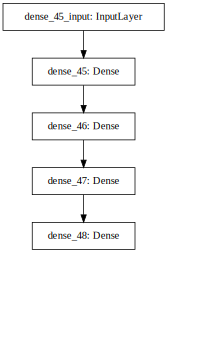

In [32]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

**Question.** Compiler et entraîner votre modèle avec le nombre d'epochs=15, l'ensemble de validation=25% et  batch size=40. Vous pouvez utiliser Adam comme optimiseur. A vous de choisir une fonction et métrique de perte adéaquates  pour ce type de problème. Réflichissez!

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

h = model.fit(X_train, y_train,
              epochs=15,
              batch_size=40,
              verbose =1,
              validation_split=0.25)

Epoch 1/15
3/3 [==============================] - 0s 52ms/step - loss: 1.0925 - acc: 0.2667 - val_loss: 1.0010 - val_acc: 0.7667
Epoch 2/15
3/3 [==============================] - 0s 11ms/step - loss: 1.0134 - acc: 0.4778 - val_loss: 0.9475 - val_acc: 0.6000
Epoch 3/15
3/3 [==============================] - 0s 10ms/step - loss: 0.9451 - acc: 0.6889 - val_loss: 0.8883 - val_acc: 0.8000
Epoch 4/15
3/3 [==============================] - 0s 12ms/step - loss: 0.8843 - acc: 0.8333 - val_loss: 0.8391 - val_acc: 0.9333
Epoch 5/15
3/3 [==============================] - 0s 11ms/step - loss: 0.8258 - acc: 0.9000 - val_loss: 0.7879 - val_acc: 0.9333
Epoch 6/15
3/3 [==============================] - 0s 10ms/step - loss: 0.7625 - acc: 0.8667 - val_loss: 0.7290 - val_acc: 0.7667
Epoch 7/15
3/3 [==============================] - 0s 10ms/step - loss: 0.7068 - acc: 0.7667 - val_loss: 0.6777 - val_acc: 0.7667
Epoch 8/15
3/3 [==============================] - 0s 11ms/step - loss: 0.6498 - acc: 0.7778 - val

**Question.** Tracez les courbes d'apprentissage (train_loss et val_loss)

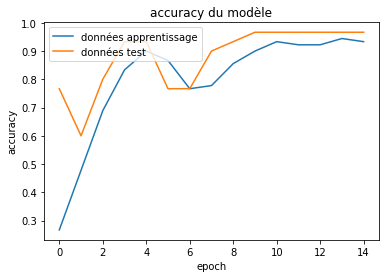

In [34]:
affiche_evolution_apprentissage(h)

**Question.** Interpréter le résultat obtenu. Que constatez-vous ? 

**Question.** Après avoir construit le modèle, utiliser la commande  EarlyStopping() sans paramètres sous Keras pour éviter le problème d'Overfitting. Re-entraîner le modèle.

In [35]:
es = keras.callbacks.EarlyStopping()
h_es = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=40,
                    verbose =1,
                    validation_split=0.25,
                    callbacks=[es])


Epoch 1/15
3/3 [==============================] - 0s 20ms/step - loss: 0.3704 - acc: 0.9444 - val_loss: 0.3830 - val_acc: 0.9667
Epoch 2/15
3/3 [==============================] - 0s 12ms/step - loss: 0.3496 - acc: 0.9444 - val_loss: 0.3604 - val_acc: 0.9667
Epoch 3/15
3/3 [==============================] - 0s 11ms/step - loss: 0.3307 - acc: 0.9444 - val_loss: 0.3477 - val_acc: 1.0000
Epoch 4/15
3/3 [==============================] - 0s 11ms/step - loss: 0.3152 - acc: 0.9667 - val_loss: 0.3308 - val_acc: 1.0000
Epoch 5/15
3/3 [==============================] - 0s 10ms/step - loss: 0.3020 - acc: 0.9667 - val_loss: 0.3031 - val_acc: 0.9667
Epoch 6/15
3/3 [==============================] - 0s 10ms/step - loss: 0.2901 - acc: 0.9444 - val_loss: 0.2849 - val_acc: 0.9667
Epoch 7/15
3/3 [==============================] - 0s 14ms/step - loss: 0.2719 - acc: 0.9556 - val_loss: 0.2936 - val_acc: 1.0000


**Question.**  Interpréter le résulat

**Question.** Re-tracez les courbes d'apprentissage (train_loss et val_loss)

In [36]:
affiche_evolution_apprentissage(h_es)

**Question.**  Interpréter le résulat des courbes d'apprentissage obtenus

**Question.** Après avoir essayer EarlyStopping() sans paramètres, personaliser maintenant cette commande en fixant les les paramètres min_delta=$1e-3$, patience=8 et mode='max'.


In [37]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=8, verbose=1, mode='max')


**Question.** Expliquer les paramètres suivants: min_delta, patience et verbose.

**Question.** Entraîner votre modèle en tenant en compte l'instruction d'EarlySopping personalisé.

In [38]:
h_es = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=40,
                    verbose =1,
                    validation_split=0.25,
                    callbacks=[es])

Epoch 1/15
3/3 [==============================] - 0s 18ms/step - loss: 0.2698 - acc: 0.9333 - val_loss: 0.2871 - val_acc: 0.9667
Epoch 2/15
3/3 [==============================] - 0s 8ms/step - loss: 0.2642 - acc: 0.9222 - val_loss: 0.2535 - val_acc: 1.0000
Epoch 3/15
3/3 [==============================] - 0s 9ms/step - loss: 0.2366 - acc: 0.9667 - val_loss: 0.2290 - val_acc: 0.9667
Epoch 4/15
3/3 [==============================] - 0s 9ms/step - loss: 0.2424 - acc: 0.9444 - val_loss: 0.2267 - val_acc: 0.9667
Epoch 5/15
3/3 [==============================] - 0s 9ms/step - loss: 0.2316 - acc: 0.9333 - val_loss: 0.2109 - val_acc: 1.0000
Epoch 6/15
3/3 [==============================] - 0s 10ms/step - loss: 0.2151 - acc: 0.9556 - val_loss: 0.2317 - val_acc: 0.9667
Epoch 7/15
3/3 [==============================] - 0s 10ms/step - loss: 0.2233 - acc: 0.9222 - val_loss: 0.1932 - val_acc: 1.0000
Epoch 8/15
3/3 [==============================] - 0s 11ms/step - loss: 0.1978 - acc: 0.9667 - val_los

**Question.** Interpréter le résultat

**Question.** Tracez les courbes d'apprentissage (train_loss et val_loss)

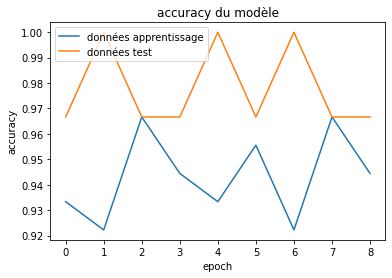

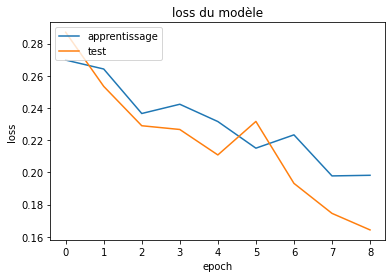

In [39]:
affiche_evolution_apprentissage(h_es)

**Question.** Que constatez-vous ?

## Régression avec EarlyStopping

Après avoir apprendre un modèle de classification, maintenant on s'intéresse à un problème de régression. 

En utilisant Pandas, nous allons charger le fichier CSV des données auto à partir de cette URL: "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv". Dans la même instruction, nous vérifiions s'il y a des valeurs manquantes comme 'NA' ou '?' et les stocker dans une variable nommée na_values.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Gérer les valeurs manquantes
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

**Question.** Convertir les données en Numpy pour faire la régression (données x et y)

In [41]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
393  27.0          4         140.0        86.0    2790          15.6    82   
394  44.0          4          97.0        52.0    2130          24.6    82   
395  32.0          4         135.0        84.0    2295          11.6    82   
396  28.0          4         120.0        79.0    2625          18.6    82   
397  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
393       1            ford mustang gl  
394       2                  vw pickup  
395       1              dodge rampage  
396       1                ford ranger  
397       1                 chevy s-10  

[398 rows x 9 columns]

In [42]:
X=df.iloc[:,1:8].values
y=df.iloc[:,0].values

print("Taille de X",X.shape)
print("Taille de y",y.shape)
print("Examples de X\n",X[:3])
print("Examples de y\n",y[:3])

Taille de X (398, 7)
Taille de y (398,)
Examples de X
 [[8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00]
 [8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00]]
Examples de y
 [18. 15. 18.]


**Question.** Découper les données en ensembles de training et test avec la taille de test=25%

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42) 

**Question.** Constuire un modèle de réseau de neurones séquentiel contenant 2 couches cachées (25, 10). Attention: Il faut choisir la métrique de perte la plus adéquate! Vous pouvez utiliser ADAM comme l'exercice précédent.

In [44]:
model=Sequential()
model.add(Dense(25,input_dim=7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='softmax'))

**Question.** Entraîner maintenant le modèle avec un nombre d'epochs=300. Vous ajouterez la méthode EarlyStopping() avec min delta=$1e-3$, patience=5 et mode='auto'. Afficher et commenter les résultats obtenus.

In [45]:
model.summary()

es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 25)                200       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

h = model.fit(X_train, y_train,
              epochs=300,
              batch_size=40,
              verbose =1,
              validation_split=0.25,
              callbacks=[es])

Epoch 1/300
6/6 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/300
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 00006: early stopping


In [47]:
affiche_evolution_apprentissage(h)